In [1]:
import numpy as np
import pandas as pd
import sklearn
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

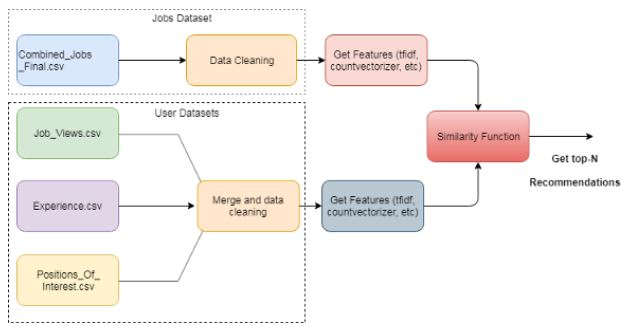

The **Combined_Jobs_Final.csv** file: has the main jobs data(**title, description, company, etc.**)

The **Job_Views.csv** file: the file with the jobs seeing for the user.

The **Experience.csv**: the file containing the experience from the user.

The **Positions_Of_Interest.csv**: contains the interest the user previously has manifested.

In [2]:
jobs = pd.read_csv('Combined_Jobs_Final.csv')
jobs.head()

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.00,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.00,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,...,Food and Beverages,● Serve food/drinks to customers in a profess...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,...,Food and Beverages,"Located at the heart of Hollywood, we are one ...",NaN,10.55,NaN,NaN,Part-Time,NaN,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC


In [3]:
jobs.shape

(84090, 23)

In [4]:
jobs.isna().sum()

Job.ID                    0
Provider                  0
Status                    0
Slug                      0
Title                     0
Position                  0
Company                2271
City                    135
State.Name              171
State.Code              171
Address               84054
Latitude                  0
Longitude                 0
Industry              83823
Job.Description          56
Requirements          84090
Salary                83861
Listing.Start           683
Listing.End             167
Employment.Type          10
Education.Required      267
Created.At                0
Updated.At                0
dtype: int64

In [5]:
# Dropping all the unnecessary columns and renaming them to easier and more readable names
jobs = pd.DataFrame(jobs, columns=['Job.ID', 'Title', 'Position', 'Company', 'City', 'Employment.Type', 'Job.Description'])
jobs.columns = ['JobID', 'Title', 'Position', 'Company','City', 'EmploymentType','JobDescription']
jobs.head()

,JobID,Title,Position,Company,City,EmploymentType,JobDescription
0,111,Server @ Tacolicious,Server,Tacolicious,Palo Alto,Part-Time,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,Part-Time,We are a popular Mediterranean wine bar and re...
3,121,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,Part-Time,● Serve food/drinks to customers in a profess...
4,127,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,Part-Time,"Located at the heart of Hollywood, we are one ..."


In [6]:
jobs.isna().sum()

JobID                0
Title                0
Position             0
Company           2271
City               135
EmploymentType      10
JobDescription      56
dtype: int64

In [7]:
jobs_na = jobs.loc[jobs['City'].isna()]
jobs_na['Company'].unique()

array(['St. Francis Hospital', 'CHI Payment Systems',
       'Genesis Health Systems', 'Driveline Retail', 'Volvo Group',
       'Home Instead Senior Care', 'Genesis Health System',
       'Academic Year In America', 'Educational Testing Services',
       'CBS Healthcare Services and Staffing'], dtype=object)

In [8]:
# Googled the headquarter
jobs.ix[jobs.Company == 'St. Francis Hospital', 'City'] = 'New York'
jobs.ix[jobs.Company == 'CHI Payment Systems', 'City'] = 'Edmond'
jobs.ix[jobs.Company == 'Genesis Health Systems', 'City'] = 'Davenport'
jobs.ix[jobs.Company == 'Genesis Health System', 'City'] = 'Davenport'
jobs.ix[jobs.Company == 'Driveline Retail', 'City'] = 'Coppell'
jobs.ix[jobs.Company == 'Volvo Group', 'City'] = 'Washington'
jobs.ix[jobs.Company == 'Home Instead Senior Care', 'City'] = 'Nebraska'
jobs.ix[jobs.Company == 'Academic Year In America', 'City'] = 'Stamford'
jobs.ix[jobs.Company == 'Educational Testing Services', 'City'] = 'Princeton'
jobs.ix[jobs.Company == 'CBS Healthcare Services and Staffing', 'City'] = 'Urbandale'

# Mistake in the company name
jobs['Company'] = jobs['Company'].replace(['Genesis Health Systems'], 'Genesis Health System')

C:\Users\s_levin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\s_levin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\s_levin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/s

In [9]:
jobs.isnull().sum()

JobID                0
Title                0
Position             0
Company           2271
City                 0
EmploymentType      10
JobDescription      56
dtype: int64

In [10]:
jobs_na = jobs[(pd.isnull(jobs.EmploymentType))]
jobs_na.head(10)

,JobID,Title,Position,Company,City,EmploymentType,JobDescription
10768,153197,Driving Partner @ Uber,Driving Partner,Uber,San Francisco,NaN,Uber is changing the way the world moves. From...
10769,153198,Driving Partner @ Uber,Driving Partner,Uber,Los Angeles,NaN,Uber is changing the way the world moves. From...
10770,153199,Driving Partner @ Uber,Driving Partner,Uber,Chicago,NaN,Uber is changing the way the world moves. From...
10771,153200,Driving Partner @ Uber,Driving Partner,Uber,Boston,NaN,Uber is changing the way the world moves. From...
10772,153201,Driving Partner @ Uber,Driving Partner,Uber,Ann Arbor,NaN,Uber is changing the way the world moves. From...
10773,153202,Driving Partner @ Uber,Driving Partner,Uber,Oklahoma,NaN,Uber is changing the way the world moves. From...
10774,153203,Driving Partner @ Uber,Driving Partner,Uber,Omaha,NaN,Uber is changing the way the world moves. From...
10775,153204,Driving Partner @ Uber,Driving Partner,Uber,Lincoln,NaN,Uber is changing the way the world moves. From...
10776,153205,Driving Partner @ Uber,Driving Partner,Uber,Minneapolis,NaN,Uber is changing the way the world moves. From...
10777,153206,Driving Partner @ Uber,Driving Partner,Uber,St. Paul,NaN,Uber is changing the way the world moves. From...


In [11]:
jobs.EmploymentType = jobs['EmploymentType'].fillna('Full-Time/Part-Time')
jobs.isna().sum()

JobID                0
Title                0
Position             0
Company           2271
City                 0
EmploymentType       0
JobDescription      56
dtype: int64

---
#### Corpus
I create a corpus from some of the columns.
['Position',
 'Company',
 'City',
 'EmploymentType',
 'JobDescription']

In [12]:
list(jobs)

['JobID',
 'Title',
 'Position',
 'Company',
 'City',
 'EmploymentType',
 'JobDescription']

In [13]:
jobs['Corpus'] = jobs['Position'].map(str)+' '+jobs.Company+' '+jobs.City+' '+jobs.EmploymentType+' '+jobs.JobDescription
jobs.Corpus.head()

0    Server Tacolicious Palo Alto Part-Time Tacolic...
1    Kitchen Staff/Chef Claude Lane San Francisco P...
2    Bartender Machka Restaurants Corp. San Francis...
3    Server Teriyaki House Brisbane Part-Time  ● Se...
4    Kitchen Staff/Chef Rosa Mexicano - Sunset Los ...
Name: Corpus, dtype: object

In [14]:
jobs = jobs.drop(['Title', 'Position', 'Company', 'City', 'EmploymentType', 'JobDescription',], axis=1).fillna(' ')
jobs.head()

,JobID,Corpus
0,111,Server Tacolicious Palo Alto Part-Time Tacolic...
1,113,Kitchen Staff/Chef Claude Lane San Francisco P...
2,117,Bartender Machka Restaurants Corp. San Francis...
3,121,Server Teriyaki House Brisbane Part-Time ● Se...
4,127,Kitchen Staff/Chef Rosa Mexicano - Sunset Los ...


In [15]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84090 entries, 0 to 84089
Data columns (total 2 columns):
JobID     84090 non-null int64
Corpus    84090 non-null object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [16]:
jobs.isna().sum()

JobID     0
Corpus    0
dtype: int64

In [17]:
jobs.Corpus = jobs.Corpus.str.replace('[^a-zA-Z ]', ' ')
jobs.Corpus.head()

0    Server Tacolicious Palo Alto Part Time Tacolic...
1    Kitchen Staff Chef Claude Lane San Francisco P...
2    Bartender Machka Restaurants Corp  San Francis...
3    Server Teriyaki House Brisbane Part Time    Se...
4    Kitchen Staff Chef Rosa Mexicano   Sunset Los ...
Name: Corpus, dtype: object

In [18]:
jobs.Corpus = jobs.Corpus.str.lower()
jobs.Corpus.head()

0    server tacolicious palo alto part time tacolic...
1    kitchen staff chef claude lane san francisco p...
2    bartender machka restaurants corp  san francis...
3    server teriyaki house brisbane part time    se...
4    kitchen staff chef rosa mexicano   sunset los ...
Name: Corpus, dtype: object

In [19]:
# Tokenizing
def tokenizer(row):
    return nltk.word_tokenize(row)

In [20]:
jobs.Corpus = jobs['Corpus'].apply(lambda row: tokenizer(row))
jobs.head()

,JobID,Corpus
0,111,"[server, tacolicious, palo, alto, part, time, ..."
1,113,"[kitchen, staff, chef, claude, lane, san, fran..."
2,117,"[bartender, machka, restaurants, corp, san, fr..."
3,121,"[server, teriyaki, house, brisbane, part, time..."
4,127,"[kitchen, staff, chef, rosa, mexicano, sunset,..."


In [21]:
def drop_stopwords(row, language):
    stop_words = set(stopwords.words(language))
    return [word for word in row if word not in stop_words]

In [22]:
jobs.Corpus = jobs['Corpus'].apply(lambda row: drop_stopwords(row, 'english'))
jobs.head()

,JobID,Corpus
0,111,"[server, tacolicious, palo, alto, part, time, ..."
1,113,"[kitchen, staff, chef, claude, lane, san, fran..."
2,117,"[bartender, machka, restaurants, corp, san, fr..."
3,121,"[server, teriyaki, house, brisbane, part, time..."
4,127,"[kitchen, staff, chef, rosa, mexicano, sunset,..."


In [23]:
def stemming(row):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in row]

In [24]:
jobs.Corpus = jobs['Corpus'].apply(lambda row: stemming(row))
jobs.head()

,JobID,Corpus
0,111,"[server, tacolici, palo, alto, part, time, tac..."
1,113,"[kitchen, staff, chef, claud, lane, san, franc..."
2,117,"[bartend, machka, restaur, corp, san, francisc..."
3,121,"[server, teriyaki, hous, brisban, part, time, ..."
4,127,"[kitchen, staff, chef, rosa, mexicano, sunset,..."


In [25]:
def rejoin_words(row):
    return (' '.join(row))

In [26]:
jobs.Corpus = jobs['Corpus'].apply(lambda row: rejoin_words(row))
jobs.head()

,JobID,Corpus
0,111,server tacolici palo alto part time tacolici f...
1,113,kitchen staff chef claud lane san francisco pa...
2,117,bartend machka restaur corp san francisco part...
3,121,server teriyaki hous brisban part time serv fo...
4,127,kitchen staff chef rosa mexicano sunset lo ang...


In [28]:
jobs.to_csv('jobs_df.csv')